## Amazon Reviews Sentiment Analysis with TextBlob

In [1]:
import json
from textblob import TextBlob
import pandas as pd
import gzip

### Data Extraction
For this excercise I am using Amzon Kindle reviews dataset from http://jmcauley.ucsd.edu/data/amazon/. I have already downloaded & extracted json file in current directory

In [2]:
#Load review data from json file
reviews = []
for line in open('reviews_Kindle_Store_5.json', 'r'):
    reviews.append(json.loads(line))

#Display first record
reviews[:1]

[{'asin': 'B000F83SZQ',
  'helpful': [0, 0],
  'overall': 5.0,
  'reviewText': "I enjoy vintage books and movies so I enjoyed reading this book.  The plot was unusual.  Don't think killing someone in self-defense but leaving the scene and the body without notifying the police or hitting someone in the jaw to knock them out would wash today.Still it was a good read for me.",
  'reviewTime': '05 5, 2014',
  'reviewerID': 'A1F6404F1VG29J',
  'reviewerName': 'Avidreader',
  'summary': 'Nice vintage story',
  'unixReviewTime': 1399248000}]

In [3]:
#Lets extract all reviews from this datset
all_reviews = []

for i in range(len(reviews)):
    all_reviews.append(reviews[i]['reviewText'])

#Display firt 5 extracted reviews
all_reviews[:5]

["I enjoy vintage books and movies so I enjoyed reading this book.  The plot was unusual.  Don't think killing someone in self-defense but leaving the scene and the body without notifying the police or hitting someone in the jaw to knock them out would wash today.Still it was a good read for me.",
 "This book is a reissue of an old one; the author was born in 1910. It's of the era of, say, Nero Wolfe. The introduction was quite interesting, explaining who the author was and why he's been forgotten; I'd never heard of him.The language is a little dated at times, like calling a gun a &#34;heater.&#34;  I also made good use of my Fire's dictionary to look up words like &#34;deshabille&#34; and &#34;Canarsie.&#34; Still, it was well worth a look-see.",
 "This was a fairly interesting read.  It had old- style terminology.I was glad to get  to read a story that doesn't have coarse, crasslanguage.  I read for fun and relaxation......I like the free ebooksbecause I can check out a writer and d

In [4]:
#Lets count total number of reviews
len(all_reviews)

#We have naerly a million reviews on kindle

982619

### Analysing Review Sentiments using TextBlob

In [5]:
#Lets create a textblob object for a review text

blob = TextBlob(all_reviews[1])

In [6]:
#Lets check sentiment of this review

blob.sentiment

#This returns 2 numbers, but what are they?

Sentiment(polarity=0.2825, subjectivity=0.38)

#### Whats Polarity & Subjectivity?

#### Polarity: Polarity score is a float within the range [-1.0, 1.0], also known as orientation polarity is the emotion expressed in the sentence. It can be positive, neagtive or neutral.

#### Subjectivity: It measures subjectivity of sentence or to what extent it represents someones personal feelings, views, or beliefs compared to objective truth or facts. subjectivity is a float within the range [0.0, 1.0] where 0.0 is very objective and 1.0 is very subjective.

In [7]:
#Lets find review sentiment for each review similarly
polarity_list,subjectivity_list=[],[]

for i in range(len(all_reviews)):
    blob = TextBlob(all_reviews[i])
    polarity_list.append(blob.sentiment.polarity)
    subjectivity_list.append(blob.sentiment.subjectivity)

In [8]:
#Building above lists takes a lot of time, lets save them as csv to save time in future
polarity_df = pd.DataFrame(polarity_list, columns=["colummn"])
polarity_df.to_csv('polarity_list.csv', index=False)

subjectivity_df = pd.DataFrame(subjectivity_list, columns=["colummn"])
subjectivity_df.to_csv('subjectivity_list.csv', index=False)

In [9]:
#Checking few values from created lists
print(polarity_list[:5])
print(subjectivity_list[:5])

[0.45, 0.2825, 0.13750000000000004, 0.2, 0.05000000000000002]
[0.7000000000000001, 0.38, 0.5875, 0.2, 0.45]


In [10]:
#Lets plot distribution of polarity
import seaborn as sns
sns.set(color_codes=True)
from pylab import *

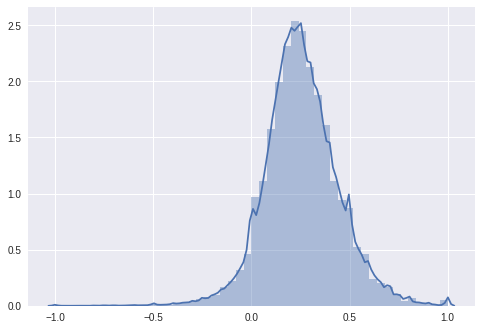

In [11]:
#Polarity Distribution
sns.distplot(polarity_list)
show()

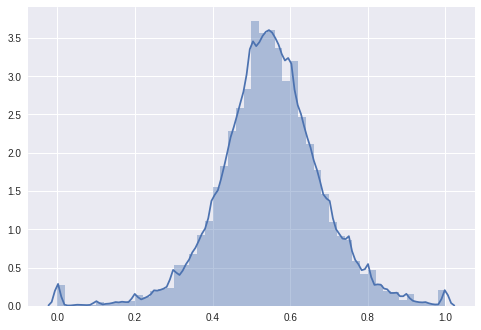

In [12]:
#Subjectivity Distribution
sns.distplot(subjectivity_list)
show()

In [13]:
#Getting statistical summary of polarity & subjectivity
from scipy import stats

print(stats.describe(polarity_list))
print(stats.describe(subjectivity_list))

DescribeResult(nobs=982619, minmax=(-1.0, 1.0), mean=0.2554416996022165, variance=0.03613085062383566, skewness=-0.0034846642680489612, kurtosis=1.966151107339833)
DescribeResult(nobs=982619, minmax=(0.0, 1.0), mean=0.5485420019964269, variance=0.017758890024147884, skewness=-0.22705026370838458, kurtosis=1.817626935291675)


In [14]:
#Lets check few highly positive reviews with very high Polarity(>.9)
c = 0
for i in range(len(polarity_list)):
    if(c>10): break
    if(polarity_list[i]>.9 and c<10) :
        print(all_reviews[i],"\n")
        c+=1

What can I say Stormtroopers.  A story with troopers is as awesome as a story with any Sith lord.  AWESOME!!!!!! 

At 1st, I didn't realize who the author was.  This is a wonderful finish to &#34;20,000 Leagues&#34;. Kept my interest. 

This is a very good story about the lives of orphans and the problems they encounter.  I recommend it and have read it a couple of times.  Well written. 

Excellent work from a great author. Well thought out and written series of books. And what a wonderful way to finish it. 

She did a wonderful job at turning the character of someone that I could not stand into someone I began to champion. 

Was a very good story I had started with the 4th one and then found the bundle, read one after the other,and reread the 4th one. Very good! 

I started reading Eve Vaughn books on Thursday. Since then I have four of books. Let me tell u they will grip you until the end. Awesome read. 

Great addition to the BDB series! I think J.R. Ward should do a follow-up book 

In [15]:
#Lets check few highly negative reviews with very high Polarity(<-.9)
c = 0
for i in range(len(polarity_list)):
    if(c>10): break
    if(polarity_list[i]<-.9 and c<10) :
        print(all_reviews[i],"\n")
        c+=1

It had never sunk in to me that these stories were so grim and horrid.  I thought I was getting a book of children's fairy tales that I could read to my grandchildren!  Be forewarned! 

This Is The Worse Book I Have Ever Read!!!! Oh my goodness, who edited this garbage? Ms. McCray please don't write anymore books. What an awful story! What an awful end! BLECH! 

i dont like it.its a waste of my time and money. i should of gotten something else. dont buy this it's terrible.boooooooooooooooooooooooooo!!!!!!!!!!!!!!!!!!! 

It was a truly horrible read, and I'm not talking about the story, but the language of the book. It sounded strained and unnatural. I don't recommend this story. 

God I hate books like this! Hate them! If I were reading this on paperback it would have been in shreds! This guy treats her like s#*t and yet whenever he touches her she just can't control herself. She's like a freakin' ally cat in heat. She has no pride! And he's an arrogant prick. Hate, hate, hate the char

In [16]:
#Lets check few subjective reviews
c = 0
for i in range(len(subjectivity_list)):
    if(c>10): break
    if(subjectivity_list[i]>.9 and c<10) :
        print(all_reviews[i],"\n")
        c+=1

What can I say Stormtroopers.  A story with troopers is as awesome as a story with any Sith lord.  AWESOME!!!!!! 

I have been a fan of Mark Twain ever since I found we share a birthday. I am glad I found this story. 

Though these be the tales of the brothers, the tales are incorrect.  These stories are happy tales while the tales written by the brothers were horrid and without a happy ending. 

It had never sunk in to me that these stories were so grim and horrid.  I thought I was getting a book of children's fairy tales that I could read to my grandchildren!  Be forewarned! 

am sorry ---- i accidentally deleted it from the kindle before i had time to check it out.  i apologize. 

At 1st, I didn't realize who the author was.  This is a wonderful finish to &#34;20,000 Leagues&#34;. Kept my interest. 

A group of men escape by balloon a Confederate prison and land on a deserted island where all their needs are met by a mysterious benefactor. 

Finally a Texas newspaper in Kindle forma

In [17]:
#Now lets check some objective reviews
c = 0
for i in range(len(subjectivity_list)):
    if(c>10): break
    if(subjectivity_list[i]<.1 and c<10) :
        print(all_reviews[i],"\n")
        c+=1

He doesn't need my recommendation but since you asked, unless you are into thorough reprobates, give it a miss.  As the wag once put it, Mark Twain shows promise. 

I  grew up considering Jules Verne and his contamparies as people with a scientific vision. But having read his work, including this one, I feel betrayed. These are racist people, believing in white man's superiority, which looks like a recurrent theme with bit of pseudoscience thrown in. Do not waste time. 

the is a story about man, life,working together for the betterment of all.the betterment of this group of man.the respect life,all things intended . 

I downloaded the Baltimore Catechism to do some research for a book I'm writing and for the memories of St. Mary's in Rockford, IL that I associate with it. It fully met both of those expectations.I will add that I never recieved five stars from any of the nuns for any reason. 

lose the war,lose your boat lose your girl(maybe).kind of an insight into the mentality of &#

In [18]:
#Lets check some neutral reviews
c = 0
for i in range(len(polarity_list)):
    if(c>10): break
    if(polarity_list[i]==0 and c<10) :
        print(all_reviews[i],"\n")
        c+=1

He doesn't need my recommendation but since you asked, unless you are into thorough reprobates, give it a miss.  As the wag once put it, Mark Twain shows promise. 

Not at all what I had expected. I was thinking it would be like the movie but was very pleasantly surprised. 

the is a story about man, life,working together for the betterment of all.the betterment of this group of man.the respect life,all things intended . 

A group of men escape by balloon a Confederate prison and land on a deserted island where all their needs are met by a mysterious benefactor. 

I downloaded the Baltimore Catechism to do some research for a book I'm writing and for the memories of St. Mary's in Rockford, IL that I associate with it. It fully met both of those expectations.I will add that I never recieved five stars from any of the nuns for any reason. 

just knowing the mythological background of our native inhabitants helps in understanding-not only those peoples, but ourselves and those around us.T